In [17]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()

path = "/Users/conorosully/Google Drive/Medium/SHAP Tutorial/Figures/{}"

In [3]:
#import dataset
data = pd.read_csv("../data/abalone.data",
                  names=["sex","length","diameter","height","whole weight",
                         "shucked weight","viscera weight","shell weight","rings"])

y = data['rings']
X = data.drop('rings', axis=1)

#Create dummy variables
X['sex.M'] = [1 if s == 'M' else 0 for s in X['sex']]
X['sex.F'] = [1 if s == 'F' else 0 for s in X['sex']]
X['sex.I'] = [1 if s == 'I' else 0 for s in X['sex']]
X = X.drop('sex', axis=1)


print(len(data))
data.head()

4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [31]:
#Binary target varibale
y = [1 if y_>10 else 0 for y_ in y]

#Train model 
model = xgb.XGBClassifier(objective="binary:logistic")
model.fit(X, y)

y_pred = model.predict(X)

print(confusion_matrix(y, y_pred))
accuracy_score(y, y_pred)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[16:26:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[2683   47]
 [  95 1352]]


0.966004309312904

In [32]:
#Get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [33]:
# SHAP correlation plot 
corr_matrix = pd.DataFrame(shap_values.values,columns=X.columns).corr()
corr_matrix

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
length,1.000000,-0.154098,-0.058124,-0.012519,0.171648,0.269545,-0.017945,0.029507,0.090982,0.115946
diameter,-0.154098,1.000000,0.462532,0.552072,-0.377893,-0.243794,0.600783,0.275506,0.153347,0.073838
height,-0.058124,0.462532,1.000000,0.402409,-0.235437,-0.151992,0.459662,0.406876,0.214690,0.213871
whole weight,-0.012519,0.552072,0.402409,1.000000,-0.688855,-0.006931,0.856489,0.268518,0.212552,0.107196
shucked weight,0.171648,-0.377893,-0.235437,-0.688855,1.000000,0.138480,-0.505181,-0.194709,-0.074820,0.036483
viscera weight,0.269545,-0.243794,-0.151992,-0.006931,0.138480,1.000000,-0.013477,-0.104437,0.037437,-0.000723
shell weight,-0.017945,0.600783,0.459662,0.856489,-0.505181,-0.013477,1.000000,0.314399,0.272258,0.156563
sex.M,0.029507,0.275506,0.406876,0.268518,-0.194709,-0.104437,0.314399,1.000000,0.082587,0.377187
sex.F,0.090982,0.153347,0.214690,0.212552,-0.074820,0.037437,0.272258,0.082587,1.000000,0.418983
sex.I,0.115946,0.073838,0.213871,0.107196,0.036483,-0.000723,0.156563,0.377187,0.418983,1.000000


<AxesSubplot:>

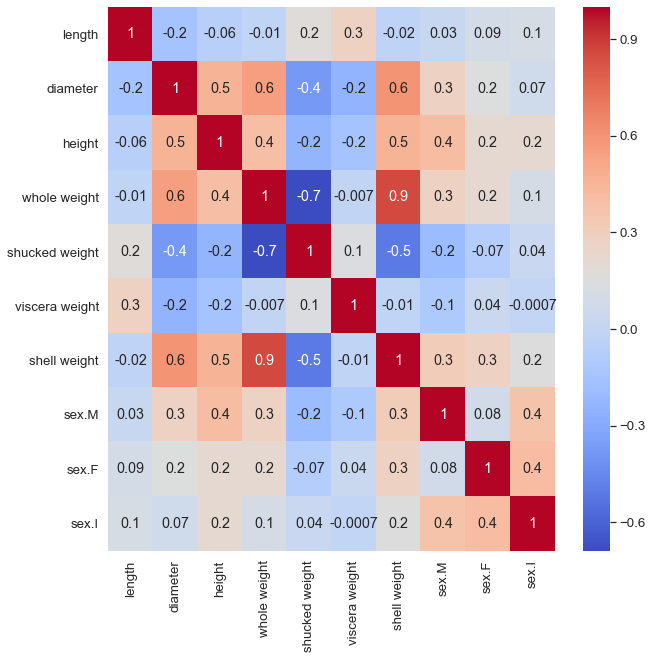

In [34]:
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,fmt='.1g')

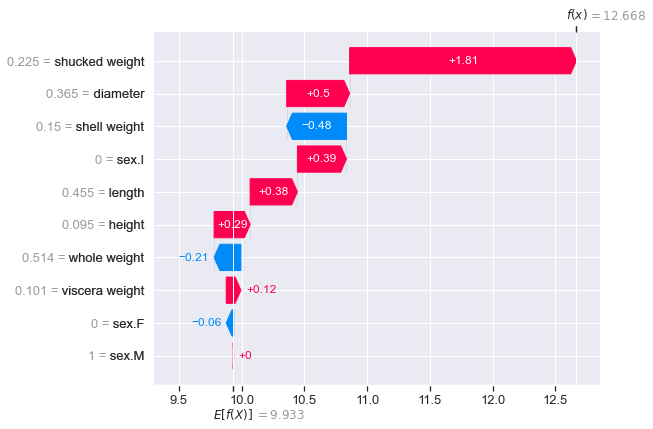

In [28]:
# water fall with feature values (coloured by mean) + predicted value 
# Waterfall plot for first observation
shap.plots.waterfall(shap_values[0])

In [99]:
X.max()

length            0.8150
diameter          0.6500
height            1.1300
whole weight      2.8255
shucked weight    1.4880
viscera weight    0.7600
shell weight      1.0050
sex.M             1.0000
sex.F             1.0000
sex.I             1.0000
dtype: float64

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1.0,0.0,0.0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,0.0,1.0,0.0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,0.0,1.0,0.0
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,0.0,1.0,0.0
10,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,0.0,1.0,0.0
12,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.1900,1.0,0.0,0.0
15,0.500,0.400,0.130,0.6645,0.2580,0.1330,0.2400,1.0,0.0,0.0
20,0.355,0.280,0.095,0.2455,0.0955,0.0620,0.0750,1.0,0.0,0.0
22,0.565,0.440,0.155,0.9395,0.4275,0.2140,0.2700,0.0,1.0,0.0
25,0.560,0.440,0.140,0.9285,0.3825,0.1880,0.3000,0.0,1.0,0.0


In [114]:
X_1

,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1,0,0
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,0,1,0
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,0,1,0
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,0,1,0
10,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.2100,0,1,0
12,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.1900,1,0,0
15,0.500,0.400,0.130,0.6645,0.2580,0.1330,0.2400,1,0,0
20,0.355,0.280,0.095,0.2455,0.0955,0.0620,0.0750,1,0,0
22,0.565,0.440,0.155,0.9395,0.4275,0.2140,0.2700,0,1,0
25,0.560,0.440,0.140,0.9285,0.3825,0.1880,0.3000,0,1,0


In [134]:
y_1 = [y_==1 for y_ in y]
X_1 = X[y_1]
#X_1 = X_1.append([X.min(),X.max()])

y_0 = [y_==0 for y_ in y]
X_0 = X[y_0]
#X_0 = X_0.append([X.min(),X.max()])

In [135]:
# beeswarm groups
shap_values_1 = explainer(X_1)
shap_values_0 = explainer(X_0)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


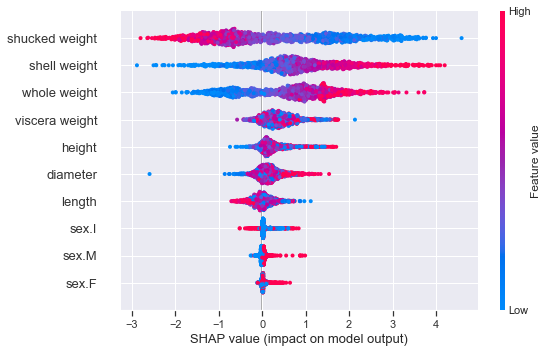

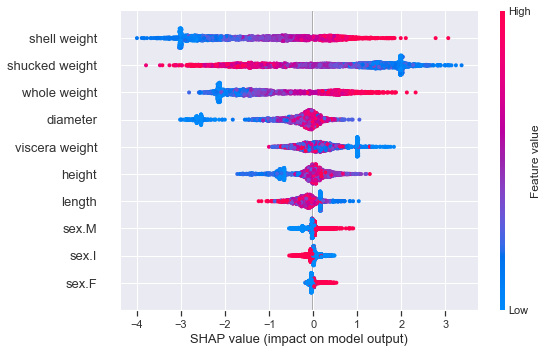

In [133]:
shap.plots.beeswarm(shap_values_1)
shap.plots.beeswarm(shap_values_0)

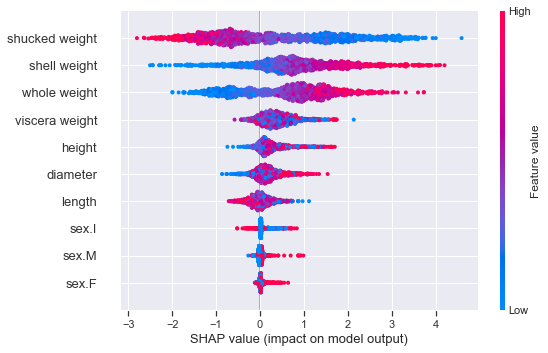

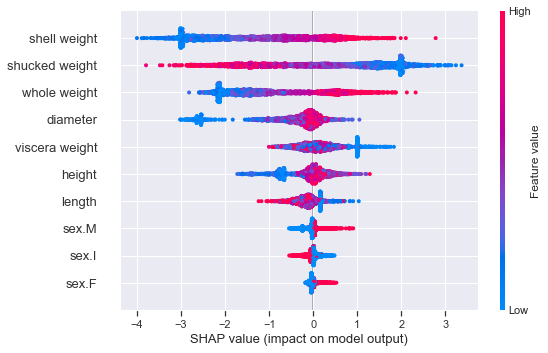

In [136]:
shap.plots.beeswarm(shap_values_1)
shap.plots.beeswarm(shap_values_0)

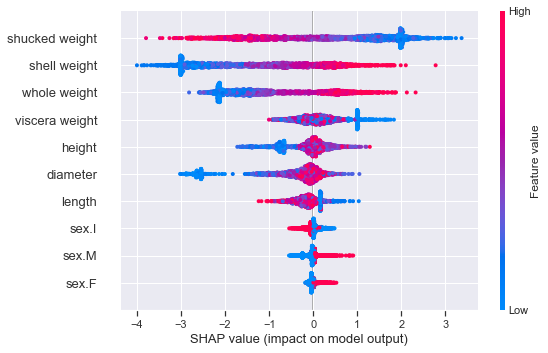

In [54]:
#Get order of features in SHAP plot for postive target variable
shap_mean = np.abs(shap_values_1.values).mean(0)
order = range(len(shap_mean))
order = [x for _,x in sorted(zip(shap_mean,order),reverse=True)]

shap.plots.beeswarm(shap_values_0,order = order)

In [75]:
color=['#FF0156' if y_==1 else '#535353' for y_ in y]


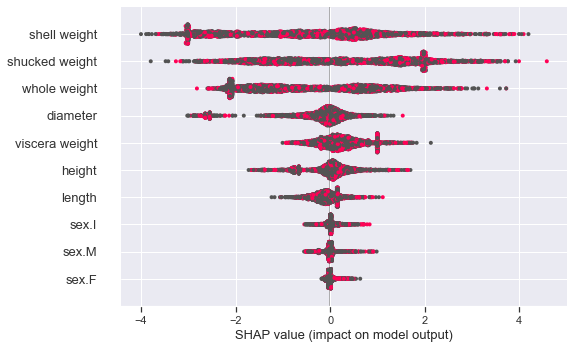

In [81]:
shap.plots.beeswarm(shap_values,color=color,color_bar=True)

In [ ]:
# Interaction mean abs plot



In [ ]:
# Interaction waterfall